<a href="https://colab.research.google.com/github/spped2000/Deep-Learning-Inversion-of-one-dimensional-acoustic-data/blob/main/Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import pyformulas as pf
from skimage import data, color
import sys
from random import random
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from scipy import signal

In [ ]:
path = 'C:\\Users\\Lenovo\\Documents\\ProjectMachine_wave'
data_dir = pjoin(dirname(path), 'ProjectMachine_wave')
mat_fname = pjoin(data_dir, 'dataV5000.mat')
mat_contents = sio.loadmat(mat_fname)

In [ ]:
mat_fname 

'C:\\Users\\Lenovo\\Documents\\ProjectMachine_wave\\dataV5000.mat'

In [ ]:
V_profile = mat_contents['VV']
Z = mat_contents['z']

In [ ]:
npw = 20
f = 10
cmin = 1000
cmax = 3500
dx = cmin/f/npw
dt_0 = dx/cmax
dt = 0.9*dt_0
c = 1000
cdt2 = c*c*dt*dt
xmax = 1000
tmax =  1
nx = math.floor(xmax/dx)+1
nt = math.floor(tmax/dt)+1
xx = [i*dx for i in range(0,nx)]
x = xx*np.ones(1)
tt = [j*dt for j in range(0,nt)]
t = tt*np.ones(1)
s = np.sin(2*np.pi*f*t)
p0 = np.zeros((nx,1))
p1 = p0
p2 = p0
u0 = np.zeros((nx,1))
u1 = u0
u2 = u0
alpha = (c*dt/dx)**2
isx = round(nx/2)
#isx = 50
v = 1000*np.ones((nx,1))
k = v**2
rho = 1

In [ ]:
def pml(npml,dx,vmin):
    a = (npml-1)*dx
    kappa = vmin*15/(2.0*a)
    damp = np.zeros(npml)
    for ix in range(0,npml):
        xa = ix*dx/a 
        damp[ix] = kappa*xa**2
        
    return damp

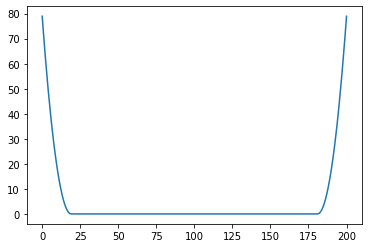

In [ ]:
npml = 20
damp1 = pml(npml,dx,1000)
d = np.zeros(nx)
d[0:npml] = np.flip(damp1)
d[-npml:] = damp1[:]
plt.plot(d)

In [ ]:
 def Pwavefield(rec,v,dx,dt):
    k = v**2
    tmax =  1
    nx = math.floor(xmax/dx)+1
    nt = math.floor(tmax/dt)+1
    rho = 1
    isx = round(nx/2)
    p = np.zeros((nx,1),dtype=np.float64)
    p_rec = []
    u = np.zeros((nx,1),dtype=np.float64)
    
    for it in range(0,nt-1):
        for ix in range(1,nx):
            p[ix] = (1-d[ix]*dt)*p[ix] - k[ix]*dt*(u[ix]-u[ix-1])/dx
        p[isx] = p[isx] + s[it]
        for ix in range(1,nx-2):
            u[ix] = (1-d[ix]*dt)*u[ix] - (dt/rho)*(p[ix+1]-p[ix])/dx
        p_rec = np.append(p_rec,p[rec])
    
    return p_rec

In [ ]:
ex = Pwavefield(60,V_profile[0],dx,dt)

In [ ]:
nx

201

In [ ]:
wf = np.zeros((5000,nt-1),dtype=np.float64)
for i in range(0,5000):
    wf[i] = Pwavefield(60,V_profile[i],dx,dt)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


In [ ]:
X = wf
Y = V_profile

In [ ]:
X = X.reshape(X.shape[0],X.shape[1],1)

In [ ]:
train_X,valid_X,train_y,valid_y = train_test_split(X, Y, test_size=0.2)
train_X = train_X.reshape(train_X.shape[0],nt-1,1)
train_y = train_y.reshape(train_y.shape[0],400)

In [ ]:
train_X.shape

(4000, 777, 1)

In [ ]:
train_y.shape

(4000, 400)

In [ ]:
model1D = models.Sequential()
model1D.add(layers.Conv1D(input_shape=(nt-1,1),kernel_size=3, filters=32, activation='relu'))
#model1D.add(layers.Conv1D(kernel_size=3, filters=32, activation='relu'))  
model1D.add(layers.MaxPooling1D())
model1D.add(layers.Flatten())
#model1D.add(layers.Dense(256,activation='sigmoid'))
#model1D.add(layers.Dense(128,activation='sigmoid'))
#model1D.add(layers.Dense(64,activation='sigmoid'))
#model1D.add(layers.Dropout(0.2))
model1D.add(layers.Dense(400,activation='linear'))
model1D.compile(optimizer='adam', loss='mse',
              metrics=['accuracy'])
model1D.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_44 (Conv1D)           (None, 775, 32)           128       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 387, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12384)             0         
_________________________________________________________________
dense_64 (Dense)             (None, 128)               1585280   
_________________________________________________________________
dense_65 (Dense)             (None, 400)               51600     
Total params: 1,637,008
Trainable params: 1,637,008
Non-trainable params: 0
_________________________________________________________________


history = model1D.fit(train_X,train_y,batch_size=16, epochs=1000)

In [ ]:
history = model1D.fit(train_X,train_y,batch_size=16, epochs=1000)

Epoch 1/1000
250/250 [==============================] - 5s 15ms/step - loss: 6604466.3845 - accuracy: 0.0000e+00
Epoch 2/1000
250/250 [==============================] - 4s 15ms/step - loss: 6431197.8606 - accuracy: 0.0000e+00
Epoch 3/1000
250/250 [==============================] - 4s 15ms/step - loss: 6266170.7789 - accuracy: 0.0000e+00
Epoch 4/1000
250/250 [==============================] - 4s 15ms/step - loss: 6110205.9622 - accuracy: 0.0000e+00
Epoch 5/1000
250/250 [==============================] - 4s 17ms/step - loss: 5957069.5120 - accuracy: 0.0000e+00
Epoch 6/1000
250/250 [==============================] - 4s 17ms/step - loss: 5806101.8745 - accuracy: 4.0463e-05
Epoch 7/1000
250/250 [==============================] - 4s 17ms/step - loss: 5655492.2490 - accuracy: 0.0100
Epoch 8/1000
250/250 [==============================] - 4s 16ms/step - loss: 5511109.2311 - accuracy: 0.0167
Epoch 9/1000
250/250 [==============================] - 4s 16ms/step - loss: 5368345.8446 - accuracy: 0.

250/250 [==============================] - 6s 23ms/step - loss: 5906.5321 - accuracy: 0.0170: 0s - loss: 5906.7353 - accuracy: 0.
Epoch 150/1000
250/250 [==============================] - 5s 20ms/step - loss: 5929.8463 - accuracy: 0.0129
Epoch 151/1000
250/250 [==============================] - 5s 19ms/step - loss: 5902.3945 - accuracy: 0.0177
Epoch 152/1000
250/250 [==============================] - 4s 16ms/step - loss: 5853.9700 - accuracy: 0.0147
Epoch 153/1000
250/250 [==============================] - 4s 16ms/step - loss: 5913.3361 - accuracy: 0.0161
Epoch 154/1000
250/250 [==============================] - 4s 16ms/step - loss: 5866.2453 - accuracy: 0.0133
Epoch 155/1000
250/250 [==============================] - 4s 17ms/step - loss: 5893.3035 - accuracy: 0.0182
Epoch 156/1000
250/250 [==============================] - 4s 17ms/step - loss: 5910.2831 - accuracy: 0.0185: 
Epoch 157/1000
250/250 [==============================] - 4s 17ms/step - loss: 5902.4786 - accuracy: 0.0152
Epoc

250/250 [==============================] - 4s 17ms/step - loss: 5927.7813 - accuracy: 0.0187
Epoch 297/1000
250/250 [==============================] - 4s 17ms/step - loss: 5884.2182 - accuracy: 0.0160
Epoch 298/1000
250/250 [==============================] - 4s 17ms/step - loss: 5907.9066 - accuracy: 0.0135
Epoch 299/1000
250/250 [==============================] - 4s 17ms/step - loss: 5914.0197 - accuracy: 0.0158
Epoch 300/1000
250/250 [==============================] - 4s 18ms/step - loss: 5911.1740 - accuracy: 0.0145
Epoch 301/1000
250/250 [==============================] - 4s 16ms/step - loss: 5955.1179 - accuracy: 0.0144
Epoch 302/1000
250/250 [==============================] - 4s 16ms/step - loss: 5883.2983 - accuracy: 0.0142: 1s - loss:
Epoch 303/1000
250/250 [==============================] - 4s 17ms/step - loss: 5895.2996 - accuracy: 0.0136
Epoch 304/1000
250/250 [==============================] - 4s 17ms/step - loss: 5923.8081 - accuracy: 0.0142
Epoch 305/1000
250/250 [=======

Epoch 371/1000
250/250 [==============================] - 5s 18ms/step - loss: 5912.3645 - accuracy: 0.0117
Epoch 372/1000
250/250 [==============================] - 4s 17ms/step - loss: 5897.0235 - accuracy: 0.0170
Epoch 373/1000
250/250 [==============================] - 5s 18ms/step - loss: 5894.9182 - accuracy: 0.0134
Epoch 374/1000
250/250 [==============================] - 5s 18ms/step - loss: 5886.0698 - accuracy: 0.0127
Epoch 375/1000
250/250 [==============================] - 4s 18ms/step - loss: 5872.1899 - accuracy: 0.0122
Epoch 376/1000
250/250 [==============================] - 4s 18ms/step - loss: 5944.8471 - accuracy: 0.0149
Epoch 377/1000
250/250 [==============================] - 5s 18ms/step - loss: 5853.4661 - accuracy: 0.0144
Epoch 378/1000
250/250 [==============================] - 5s 19ms/step - loss: 5898.6570 - accuracy: 0.0106
Epoch 379/1000
250/250 [==============================] - 5s 18ms/step - loss: 5899.3872 - accuracy: 0.0141
Epoch 380/1000
250/250 [====

250/250 [==============================] - 6s 22ms/step - loss: 5927.5924 - accuracy: 0.0136
Epoch 445/1000
250/250 [==============================] - 4s 17ms/step - loss: 5917.7275 - accuracy: 0.0125: 1s - loss: 5919.0186
Epoch 446/1000
250/250 [==============================] - 4s 17ms/step - loss: 5928.2390 - accuracy: 0.0139: 1s - lo
Epoch 447/1000
250/250 [==============================] - 4s 17ms/step - loss: 5878.4695 - accuracy: 0.0156
Epoch 448/1000
250/250 [==============================] - 5s 18ms/step - loss: 5863.6443 - accuracy: 0.0140
Epoch 449/1000
250/250 [==============================] - 5s 18ms/step - loss: 5869.2762 - accuracy: 0.0123
Epoch 450/1000
250/250 [==============================] - 4s 17ms/step - loss: 5866.8581 - accuracy: 0.0173
Epoch 451/1000
250/250 [==============================] - 4s 17ms/step - loss: 5891.9440 - accuracy: 0.0126: 0s - loss: 5890.7442 - accura
Epoch 452/1000
250/250 [==============================] - 4s 17ms/step - loss: 5885.2998 

250/250 [==============================] - 10s 38ms/step - loss: 5941.9440 - accuracy: 0.0124
Epoch 571/1000
250/250 [==============================] - 10s 39ms/step - loss: 5933.0023 - accuracy: 0.0147
Epoch 572/1000
250/250 [==============================] - 10s 39ms/step - loss: 5950.5000 - accuracy: 0.0126
Epoch 573/1000
250/250 [==============================] - 9s 37ms/step - loss: 5882.4688 - accuracy: 0.0107
Epoch 574/1000
250/250 [==============================] - 9s 36ms/step - loss: 5887.0457 - accuracy: 0.0149- E
Epoch 575/1000
250/250 [==============================] - 9s 36ms/step - loss: 5877.8633 - accuracy: 0.0158: 0s - loss: 5875.7722 - accura
Epoch 576/1000
250/250 [==============================] - 9s 37ms/step - loss: 5900.8478 - accuracy: 0.0148: 7s - loss: 58 - ETA: 4s - loss: 5894
Epoch 577/1000
250/250 [==============================] - 9s 38ms/step - loss: 5896.6115 - accuracy: 0.0159
Epoch 578/1000
250/250 [==============================] - 9s 37ms/step - los

250/250 [==============================] - 8s 33ms/step - loss: 5881.4887 - accuracy: 0.0144: 8s - loss: 6019.9393 - accura - ETA: 7s - loss: 5947.98 - ETA: 5s - loss: 5882.4803 - accuracy: 0.016 - ETA: 5s - loss: 5881. - ETA: 4s - loss: 5876. - ETA: 
Epoch 691/1000
250/250 [==============================] - 8s 33ms/step - loss: 5926.4527 - accuracy: 0.0146
Epoch 692/1000
250/250 [==============================] - 8s 32ms/step - loss: 5938.4794 - accuracy: 0.0149
Epoch 693/1000
250/250 [==============================] - 8s 34ms/step - loss: 5931.0210 - accuracy: 0.0132: 3s - loss: 5946.8045 - - ETA: 2s - loss:  - ETA: 0s - loss: 5932.8536 - accuracy:
Epoch 694/1000
250/250 [==============================] - 8s 32ms/step - loss: 5886.9665 - accuracy: 0.0136
Epoch 695/1000
250/250 [==============================] - 6s 25ms/step - loss: 5887.9126 - accuracy: 0.0143
Epoch 696/1000
250/250 [==============================] - 6s 25ms/step - loss: 5902.7098 - accuracy: 0.0153
Epoch 697/1000
25

250/250 [==============================] - 8s 32ms/step - loss: 5857.0915 - accuracy: 0.0141: 2s - loss: 5839.4362 - accuracy - ETA: 1s - loss:
Epoch 814/1000
250/250 [==============================] - 8s 32ms/step - loss: 5876.8018 - accuracy: 0.0142: 6s - loss:  - ETA: 5s - loss: 5896.6467  - ETA: 1s - loss: 5872.4634
Epoch 815/1000
250/250 [==============================] - 8s 31ms/step - loss: 5927.6196 - accuracy: 0.0138: 1s - loss: 5931.7425 - acc - ETA: 1s - loss: 5930.4436
Epoch 816/1000
250/250 [==============================] - 8s 31ms/step - loss: 5888.8587 - accuracy: 0.0140: 6s - loss: 5867.5 - ETA: 1s - loss: 58
Epoch 817/1000
250/250 [==============================] - 8s 31ms/step - loss: 5848.0483 - accuracy: 0.0117
Epoch 818/1000
250/250 [==============================] - 8s 31ms/step - loss: 5881.9751 - accuracy: 0.0139
Epoch 819/1000
250/250 [==============================] - 8s 32ms/step - loss: 5867.1037 - accuracy: 0.0144
Epoch 820/1000
250/250 [==================

250/250 [==============================] - 6s 25ms/step - loss: 5866.2140 - accuracy: 0.0139: 
Epoch 940/1000
250/250 [==============================] - 6s 23ms/step - loss: 5899.9547 - accuracy: 0.0165
Epoch 941/1000
250/250 [==============================] - 6s 23ms/step - loss: 5883.0974 - accuracy: 0.0145: 1s - loss: 5
Epoch 942/1000
250/250 [==============================] - 6s 25ms/step - loss: 5899.5605 - accuracy: 0.0146: 
Epoch 943/1000
250/250 [==============================] - ETA: 0s - loss: 5879.2491 - accuracy: 0.0157 - 6s 24ms/step - loss: 5879.4319 - accuracy: 0.0157
Epoch 944/1000
250/250 [==============================] - 7s 27ms/step - loss: 5917.5843 - accuracy: 0.0124
Epoch 945/1000
250/250 [==============================] - 7s 27ms/step - loss: 5885.8452 - accuracy: 0.0132
Epoch 946/1000
250/250 [==============================] - 7s 27ms/step - loss: 5882.5408 - accuracy: 0.0132: 3s  - ETA: 0s - loss: 5880.7969 
Epoch 947/1000
250/250 [============================

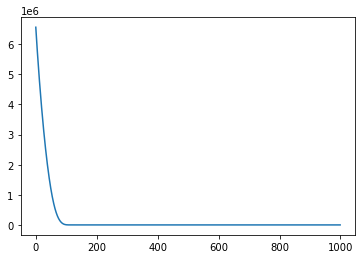

In [ ]:
plt.plot(history.history['loss'])
# 5000 sample data and globalo Max pooling

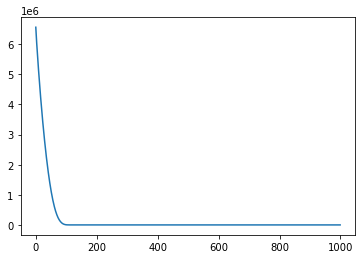

In [ ]:
plt.plot(history.history['loss'])
# 5000 sample data and globalo average pooling

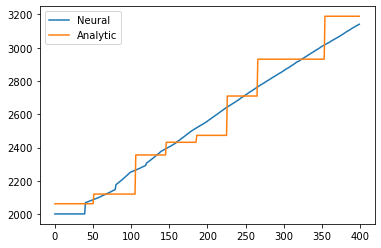

In [ ]:
# 5000 sample data and Max pooling
y1 = tf.expand_dims(valid_X[10],0)
predictions = model1D.predict(y1)
plt.plot(predictions[0],label='Neural')
plt.plot(valid_y[10][:], label='Analytic') 
plt.legend()

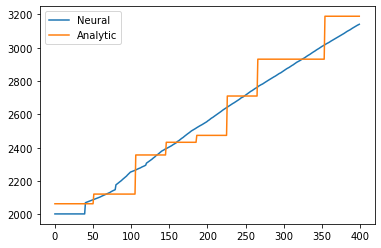

In [ ]:
# 5000 sample data and globalo average pooling
y1 = tf.expand_dims(valid_X[10],0)
predictions = model1D.predict(y1)
plt.plot(predictions[0],label='Neural')
plt.plot(valid_y[10][:], label='Analytic') 
plt.legend()

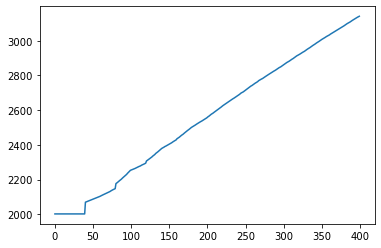

In [ ]:
# 5000 sample data and globalo average pooling
plt.plot(predictions[0],label='Neural')

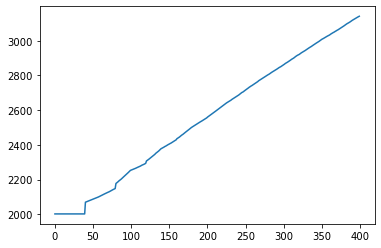

In [ ]:
# 5000 sample data and Max pooling
plt.plot(predictions[0],label='Neural')

In [ ]:
model1D1 = models.Sequential()
model1D1.add(layers.Conv1D(input_shape=(nt-1,1),kernel_size=3, filters=32, activation='relu'))
#model1D.add(layers.Conv1D(kernel_size=3, filters=32, activation='relu'))  
model1D1.add(layers.MaxPooling1D())
model1D1.add(layers.Flatten())
#model1D.add(layers.Dense(256,activation='sigmoid'))
#model1D.add(layers.Dense(128,activation='sigmoid'))
#model1D.add(layers.Dense(64,activation='sigmoid'))
#model1D.add(layers.Dropout(0.2))
model1D1.add(layers.Dense(400,activation='linear'))
model1D1.compile(optimizer='adam', loss='mae',
              metrics=['accuracy'])
model1D1.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 775, 32)           128       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 387, 32)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12384)             0         
_________________________________________________________________
dense_67 (Dense)             (None, 400)               4954000   
Total params: 4,954,128
Trainable params: 4,954,128
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1D1.fit(train_X,train_y,batch_size=16, epochs=1000)


Epoch 1/1000
250/250 [==============================] - 13s 48ms/step - loss: 2273.3814 - accuracy: 1.0861e-04
Epoch 2/1000
250/250 [==============================] - 12s 50ms/step - loss: 115.1971 - accuracy: 0.0138
Epoch 3/1000
250/250 [==============================] - 13s 54ms/step - loss: 88.3050 - accuracy: 0.0145 3s - ETA: 1s - l
Epoch 4/1000
250/250 [==============================] - 15s 61ms/step - loss: 85.6383 - accuracy: 0.0182 1s - loss: 85
Epoch 5/1000
250/250 [==============================] - 14s 57ms/step - loss: 80.9710 - accuracy: 0.0123 0s - loss: 81.0987 - accuracy: 0.0 - ETA: 0s - loss: 81.0780 - ac
Epoch 6/1000
250/250 [==============================] - 17s 70ms/step - loss: 75.1345 - accuracy: 0.0197 0s - loss: 75.2129 - ac
Epoch 7/1000
250/250 [==============================] - 16s 64ms/step - loss: 69.1720 - accuracy: 0.0171
Epoch 8/1000
250/250 [==============================] - 9s 38ms/step - loss: 64.1408 - accuracy: 0.0131: 1s - loss: 64.2816 - ac
Epoch 9/

250/250 [==============================] - 14s 55ms/step - loss: 51.2505 - accuracy: 0.0156
Epoch 153/1000
250/250 [==============================] - 14s 57ms/step - loss: 51.1369 - accuracy: 0.0161
Epoch 154/1000
250/250 [==============================] - 15s 62ms/step - loss: 51.1913 - accuracy: 0.0155 2s
Epoch 155/1000
250/250 [==============================] - 15s 59ms/step - loss: 51.0387 - accuracy: 0.0143
Epoch 156/1000
250/250 [==============================] - 14s 57ms/step - loss: 51.0535 - accuracy: 0.0198
Epoch 157/1000
250/250 [==============================] - 16s 63ms/step - loss: 51.0899 - accuracy: 0.0162 8s - los -
Epoch 158/1000
250/250 [==============================] - 15s 60ms/step - loss: 50.9583 - accuracy: 0.0204
Epoch 159/1000
250/250 [==============================] - 15s 59ms/step - loss: 50.7442 - accuracy: 0.0165 7s -  - ETA: 4s - loss: 5
Epoch 160/1000
250/250 [==============================] - 14s 56ms/step - loss: 51.1583 - accuracy: 0.0130
Epoch 161/10

250/250 [==============================] - 12s 49ms/step - loss: 50.1693 - accuracy: 0.0167
Epoch 224/1000
250/250 [==============================] - 12s 49ms/step - loss: 50.0137 - accuracy: 0.0222
Epoch 225/1000
250/250 [==============================] - 12s 49ms/step - loss: 49.7974 - accuracy: 0.0154
Epoch 226/1000
250/250 [==============================] - 12s 49ms/step - loss: 49.8639 - accuracy: 0.0195
Epoch 227/1000
250/250 [==============================] - 12s 48ms/step - loss: 50.3770 - accuracy: 0.0154 5s - loss: 50.5983 - accuracy: 0.0 - ETA: 5s - loss: 50.5900 - ETA: 0s - loss: 50.3933 - accuracy:
Epoch 228/1000
250/250 [==============================] - 12s 48ms/step - loss: 49.9917 - accuracy: 0.0137
Epoch 229/1000
250/250 [==============================] - 12s 48ms/step - loss: 50.0937 - accuracy: 0.0152
Epoch 230/1000
250/250 [==============================] - 12s 49ms/step - loss: 49.7674 - accuracy: 0.0150
Epoch 231/1000
250/250 [==============================] - 12

250/250 [==============================] - 12s 49ms/step - loss: 48.3737 - accuracy: 0.0145
Epoch 364/1000
250/250 [==============================] - 13s 51ms/step - loss: 48.7531 - accuracy: 0.0182
Epoch 365/1000
250/250 [==============================] - 12s 48ms/step - loss: 48.4211 - accuracy: 0.0149 2s - lo - ETA: 0s - loss: 48.4180 - accuracy: 0
Epoch 366/1000
250/250 [==============================] - 12s 48ms/step - loss: 48.7611 - accuracy: 0.0168
Epoch 367/1000
250/250 [==============================] - 12s 48ms/step - loss: 48.6484 - accuracy: 0.0180
Epoch 368/1000
250/250 [==============================] - 12s 48ms/step - loss: 48.3671 - accuracy: 0.0167
Epoch 369/1000
250/250 [==============================] - 12s 48ms/step - loss: 48.6917 - accuracy: 0.0193
Epoch 370/1000
250/250 [==============================] - 12s 48ms/step - loss: 48.4961 - accuracy: 0.0156
Epoch 371/1000
250/250 [==============================] - 12s 49ms/step - loss: 48.4534 - accuracy: 0.0162: 0s 

250/250 [==============================] - 9s 35ms/step - loss: 47.3329 - accuracy: 0.0210
Epoch 512/1000
250/250 [==============================] - 8s 33ms/step - loss: 47.2751 - accuracy: 0.0162
Epoch 513/1000
250/250 [==============================] - 8s 34ms/step - loss: 47.1297 - accuracy: 0.0170
Epoch 514/1000
250/250 [==============================] - 9s 35ms/step - loss: 47.4469 - accuracy: 0.0176
Epoch 515/1000
250/250 [==============================] - 9s 35ms/step - loss: 47.1443 - accuracy: 0.0148
Epoch 516/1000
250/250 [==============================] - 9s 35ms/step - loss: 47.3299 - accuracy: 0.0174
Epoch 517/1000
250/250 [==============================] - 11s 42ms/step - loss: 47.0807 - accuracy: 0.0155
Epoch 518/1000
250/250 [==============================] - 11s 43ms/step - loss: 47.0264 - accuracy: 0.0238
Epoch 519/1000
250/250 [==============================] - 9s 38ms/step - loss: 47.2015 - accuracy: 0.0143: 0s - loss: 47.2018 - accuracy: 0.01
Epoch 520/1000
250/250

250/250 [==============================] - 11s 46ms/step - loss: 46.0031 - accuracy: 0.0192
Epoch 663/1000
250/250 [==============================] - 11s 44ms/step - loss: 46.1357 - accuracy: 0.0191
Epoch 664/1000
250/250 [==============================] - 11s 42ms/step - loss: 46.0630 - accuracy: 0.0198
Epoch 665/1000
250/250 [==============================] - 11s 43ms/step - loss: 46.0572 - accuracy: 0.0167
Epoch 666/1000
250/250 [==============================] - 11s 43ms/step - loss: 46.0833 - accuracy: 0.0175
Epoch 667/1000
250/250 [==============================] - 11s 44ms/step - loss: 45.9842 - accuracy: 0.0178
Epoch 668/1000
250/250 [==============================] - 11s 44ms/step - loss: 46.0015 - accuracy: 0.0166
Epoch 669/1000
250/250 [==============================] - 11s 45ms/step - loss: 46.0341 - accuracy: 0.0168
Epoch 670/1000
250/250 [==============================] - 11s 44ms/step - loss: 45.8994 - accuracy: 0.0132 1s - loss: 45.880
Epoch 671/1000
250/250 [==========

250/250 [==============================] - 8s 33ms/step - loss: 45.0448 - accuracy: 0.0206
Epoch 815/1000
250/250 [==============================] - 8s 34ms/step - loss: 45.1933 - accuracy: 0.0261
Epoch 816/1000
250/250 [==============================] - 8s 34ms/step - loss: 45.0834 - accuracy: 0.0163
Epoch 817/1000
250/250 [==============================] - 8s 32ms/step - loss: 45.3021 - accuracy: 0.0200
Epoch 818/1000
250/250 [==============================] - 8s 34ms/step - loss: 45.0062 - accuracy: 0.0169
Epoch 819/1000
250/250 [==============================] - 8s 32ms/step - loss: 45.1922 - accuracy: 0.0204
Epoch 820/1000
250/250 [==============================] - 8s 33ms/step - loss: 45.0328 - accuracy: 0.0163
Epoch 821/1000
250/250 [==============================] - 8s 34ms/step - loss: 45.1835 - accuracy: 0.0136
Epoch 822/1000
250/250 [==============================] - 9s 35ms/step - loss: 45.1174 - accuracy: 0.0185
Epoch 823/1000
250/250 [==============================] - 8s 

250/250 [==============================] - 8s 32ms/step - loss: 44.2086 - accuracy: 0.0130
Epoch 967/1000
250/250 [==============================] - 8s 33ms/step - loss: 44.5917 - accuracy: 0.0155
Epoch 968/1000
250/250 [==============================] - 8s 33ms/step - loss: 44.5159 - accuracy: 0.0177
Epoch 969/1000
250/250 [==============================] - 8s 33ms/step - loss: 44.2398 - accuracy: 0.0173
Epoch 970/1000
250/250 [==============================] - 8s 32ms/step - loss: 44.1739 - accuracy: 0.0187
Epoch 971/1000
250/250 [==============================] - 8s 33ms/step - loss: 44.3693 - accuracy: 0.0141
Epoch 972/1000
250/250 [==============================] - 8s 33ms/step - loss: 44.4037 - accuracy: 0.0220
Epoch 973/1000
250/250 [==============================] - 8s 33ms/step - loss: 44.3718 - accuracy: 0.0175
Epoch 974/1000
250/250 [==============================] - 8s 33ms/step - loss: 44.1330 - accuracy: 0.0198
Epoch 975/1000
250/250 [==============================] - 8s 

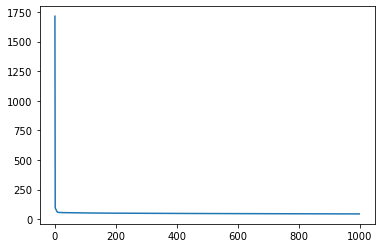

In [ ]:
plt.plot(history1.history['loss'])

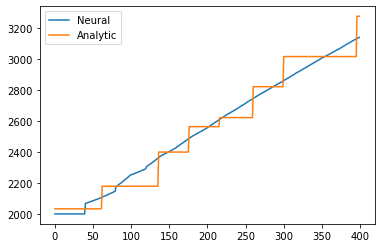

In [ ]:
# 5000 sample data and Max pooling not dense layers loss
y1 = tf.expand_dims(valid_X[10],0)
predictions = model1D.predict(y1)
plt.plot(predictions[0],label='Neural')
plt.plot(valid_y[10][:], label='Analytic') 
plt.legend()

In [ ]:
X = wf
Y = V_profile
train_X = train_X.reshape(train_X.shape[0],nt-1,1)
train_y = train_y.reshape(train_y.shape[0],400)

In [ ]:
model1D = models.Sequential()
model1D.add(layers.Conv1D(input_shape=(nt-1,1),kernel_size=3, filters=32, activation='relu'))
#model1D.add(layers.Conv1D(kernel_size=3, filters=32, activation='relu'))  
model1D.add(layers.MaxPooling1D())
model1D.add(layers.Flatten())
#model1D.add(layers.Dense(256,activation='sigmoid'))
#model1D.add(layers.Dense(128,activation='sigmoid'))
#model1D.add(layers.Dense(64,activation='sigmoid'))
#model1D.add(layers.Dropout(0.2))
model1D.add(layers.Dense(400,activation='linear'))
model1D.compile(optimizer='adam', loss='mse',
              metrics=['accuracy'])
model1D.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 775, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 387, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 12384)             0         
_________________________________________________________________
dense (Dense)                (None, 400)               4954000   
Total params: 4,954,128
Trainable params: 4,954,128
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model1D.fit(train_X,train_y,batch_size=16, epochs=2000)

Epoch 1/2000
250/250 [==============================] - 8s 32ms/step - loss: 3210.6790 - accuracy: 0.0205
Epoch 2/2000
250/250 [==============================] - 8s 31ms/step - loss: 3199.6165 - accuracy: 0.0233
Epoch 3/2000
250/250 [==============================] - 8s 31ms/step - loss: 3205.3940 - accuracy: 0.0247
Epoch 4/2000
250/250 [==============================] - 8s 32ms/step - loss: 3208.3706 - accuracy: 0.0230
Epoch 5/2000
250/250 [==============================] - 8s 31ms/step - loss: 3206.0657 - accuracy: 0.0235
Epoch 6/2000
250/250 [==============================] - 8s 31ms/step - loss: 3200.5823 - accuracy: 0.0250
Epoch 7/2000
250/250 [==============================] - 8s 31ms/step - loss: 3202.4746 - accuracy: 0.0233
Epoch 8/2000
250/250 [==============================] - 8s 31ms/step - loss: 3204.5286 - accuracy: 0.0250
Epoch 9/2000
250/250 [==============================] - 8s 32ms/step - loss: 3205.4797 - accuracy: 0.0213
Epoch 10/2000
250/250 [=======================

250/250 [==============================] - 8s 34ms/step - loss: 3200.3669 - accuracy: 0.0250
Epoch 151/2000
250/250 [==============================] - 9s 34ms/step - loss: 3192.8125 - accuracy: 0.0243
Epoch 152/2000
250/250 [==============================] - 9s 34ms/step - loss: 3196.9761 - accuracy: 0.0237
Epoch 153/2000
250/250 [==============================] - 9s 34ms/step - loss: 3196.3616 - accuracy: 0.0195
Epoch 154/2000
250/250 [==============================] - 8s 34ms/step - loss: 3196.1938 - accuracy: 0.0265
Epoch 155/2000
250/250 [==============================] - 8s 34ms/step - loss: 3201.5864 - accuracy: 0.0223
Epoch 156/2000
250/250 [==============================] - 9s 35ms/step - loss: 3205.4448 - accuracy: 0.0205
Epoch 157/2000
250/250 [==============================] - 8s 34ms/step - loss: 3191.4138 - accuracy: 0.0223: 6s - loss: 3227.066 - ETA: 4s - loss:  -
Epoch 158/2000
250/250 [==============================] - 9s 35ms/step - loss: 3191.1951 - accuracy: 0.0230
E

250/250 [==============================] - 8s 31ms/step - loss: 3205.0571 - accuracy: 0.0233
Epoch 296/2000
250/250 [==============================] - 8s 31ms/step - loss: 3202.0330 - accuracy: 0.0225
Epoch 297/2000
250/250 [==============================] - 8s 30ms/step - loss: 3187.3208 - accuracy: 0.0265
Epoch 298/2000
250/250 [==============================] - 8s 31ms/step - loss: 3193.7534 - accuracy: 0.0253
Epoch 299/2000
250/250 [==============================] - 8s 31ms/step - loss: 3190.8896 - accuracy: 0.0243
Epoch 300/2000
250/250 [==============================] - 8s 31ms/step - loss: 3196.2539 - accuracy: 0.0235
Epoch 301/2000
250/250 [==============================] - 8s 31ms/step - loss: 3207.4146 - accuracy: 0.0237
Epoch 302/2000
250/250 [==============================] - 8s 31ms/step - loss: 3184.0452 - accuracy: 0.0203
Epoch 303/2000
250/250 [==============================] - 8s 30ms/step - loss: 3198.5605 - accuracy: 0.0215
Epoch 304/2000
250/250 [===================

250/250 [==============================] - 9s 35ms/step - loss: 3179.6562 - accuracy: 0.0223
Epoch 446/2000
250/250 [==============================] - 8s 34ms/step - loss: 3184.7000 - accuracy: 0.0230
Epoch 447/2000
250/250 [==============================] - 9s 35ms/step - loss: 3184.6931 - accuracy: 0.0237
Epoch 448/2000
250/250 [==============================] - 9s 34ms/step - loss: 3174.9070 - accuracy: 0.0253
Epoch 449/2000
250/250 [==============================] - 9s 34ms/step - loss: 3197.1111 - accuracy: 0.0237: 0s - loss: 3201.9998 - acc
Epoch 450/2000
250/250 [==============================] - 9s 34ms/step - loss: 3188.9963 - accuracy: 0.0227
Epoch 451/2000
250/250 [==============================] - 9s 34ms/step - loss: 3182.1292 - accuracy: 0.0198
Epoch 452/2000
250/250 [==============================] - 9s 35ms/step - loss: 3185.4119 - accuracy: 0.0240
Epoch 453/2000
250/250 [==============================] - 9s 35ms/step - loss: 3184.4346 - accuracy: 0.0235
Epoch 454/2000


250/250 [==============================] - 13s 50ms/step - loss: 3186.3425 - accuracy: 0.0237
Epoch 590/2000
250/250 [==============================] - 13s 51ms/step - loss: 3182.3416 - accuracy: 0.0247
Epoch 591/2000
250/250 [==============================] - 19s 77ms/step - loss: 3179.6445 - accuracy: 0.0227 1s - loss: 3176.
Epoch 592/2000
250/250 [==============================] - 15s 60ms/step - loss: 3180.9590 - accuracy: 0.0227 10s - loss: 3229.9
Epoch 593/2000
250/250 [==============================] - 15s 61ms/step - loss: 3185.5139 - accuracy: 0.0233 1s - loss: 
Epoch 594/2000
250/250 [==============================] - 14s 56ms/step - loss: 3182.3223 - accuracy: 0.0233
Epoch 595/2000
250/250 [==============================] - 13s 51ms/step - loss: 3177.9060 - accuracy: 0.0213
Epoch 596/2000
250/250 [==============================] - 15s 59ms/step - loss: 3178.0039 - accuracy: 0.0225
Epoch 597/2000
250/250 [==============================] - 13s 52ms/step - loss: 3171.4868 - acc

250/250 [==============================] - 14s 57ms/step - loss: 3180.9370 - accuracy: 0.0237 7s - loss: 
Epoch 714/2000
250/250 [==============================] - 14s 54ms/step - loss: 3177.6340 - accuracy: 0.0217
Epoch 715/2000
250/250 [==============================] - 14s 54ms/step - loss: 3171.1667 - accuracy: 0.0223
Epoch 716/2000
250/250 [==============================] - 14s 56ms/step - loss: 3170.9019 - accuracy: 0.0250 2s - loss: 3172.06 - ETA: 1s - loss: 3168.4509 - 
Epoch 717/2000
250/250 [==============================] - 14s 56ms/step - loss: 3186.3503 - accuracy: 0.0233
Epoch 718/2000
250/250 [==============================] - 14s 56ms/step - loss: 3179.9180 - accuracy: 0.0250
Epoch 719/2000
250/250 [==============================] - 14s 55ms/step - loss: 3174.9917 - accuracy: 0.0230
Epoch 720/2000
250/250 [==============================] - 14s 55ms/step - loss: 3170.8384 - accuracy: 0.0223
Epoch 721/2000
250/250 [==============================] - 14s 55ms/step - loss: 3

250/250 [==============================] - 13s 53ms/step - loss: 3159.1536 - accuracy: 0.0262
Epoch 848/2000
250/250 [==============================] - 12s 50ms/step - loss: 3179.5532 - accuracy: 0.0253 7s - loss: 3172.3936 - 
Epoch 849/2000
250/250 [==============================] - 12s 47ms/step - loss: 3182.7380 - accuracy: 0.0217
Epoch 850/2000
250/250 [==============================] - 13s 53ms/step - loss: 3175.7612 - accuracy: 0.0240
Epoch 851/2000
250/250 [==============================] - 14s 56ms/step - loss: 3173.9258 - accuracy: 0.0235
Epoch 852/2000
250/250 [==============================] - 14s 56ms/step - loss: 3175.3733 - accuracy: 0.0237
Epoch 853/2000
250/250 [==============================] - 14s 55ms/step - loss: 3167.7302 - accuracy: 0.0227 4s - loss: 31
Epoch 854/2000
250/250 [==============================] - 14s 56ms/step - loss: 3170.7021 - accuracy: 0.0233
Epoch 855/2000
250/250 [==============================] - 14s 55ms/step - loss: 3169.8049 - accuracy: 0.0

250/250 [==============================] - 13s 54ms/step - loss: 3168.1304 - accuracy: 0.0217
Epoch 980/2000
250/250 [==============================] - 14s 57ms/step - loss: 3171.0291 - accuracy: 0.0245 8s 
Epoch 981/2000
250/250 [==============================] - 15s 59ms/step - loss: 3180.4524 - accuracy: 0.0253 0s - loss: 3177.4241 - acc
Epoch 982/2000
250/250 [==============================] - 14s 57ms/step - loss: 3167.2625 - accuracy: 0.0237 8s - loss - ETA: 2s
Epoch 983/2000
250/250 [==============================] - 15s 58ms/step - loss: 3160.1550 - accuracy: 0.0210
Epoch 984/2000
250/250 [==============================] - 15s 61ms/step - loss: 3165.8970 - accuracy: 0.0243 0s - loss: 3165.8970 - accuracy: 0.024
Epoch 985/2000
250/250 [==============================] - 14s 57ms/step - loss: 3168.0967 - accuracy: 0.0217
Epoch 986/2000
250/250 [==============================] - 14s 56ms/step - loss: 3168.3413 - accuracy: 0.0227 1s - loss: 3168.4558 - a - ETA: 0s - loss: 3173.3513 

250/250 [==============================] - 8s 31ms/step - loss: 3167.5601 - accuracy: 0.0230
Epoch 1123/2000
250/250 [==============================] - 7s 30ms/step - loss: 3170.2593 - accuracy: 0.0247
Epoch 1124/2000
250/250 [==============================] - 8s 30ms/step - loss: 3168.9971 - accuracy: 0.0213
Epoch 1125/2000
250/250 [==============================] - 8s 30ms/step - loss: 3162.9197 - accuracy: 0.0230
Epoch 1126/2000
250/250 [==============================] - 7s 30ms/step - loss: 3151.5940 - accuracy: 0.0247
Epoch 1127/2000
250/250 [==============================] - 8s 30ms/step - loss: 3157.4580 - accuracy: 0.0245
Epoch 1128/2000
250/250 [==============================] - 7s 30ms/step - loss: 3177.1257 - accuracy: 0.0233
Epoch 1129/2000
250/250 [==============================] - 8s 30ms/step - loss: 3164.1292 - accuracy: 0.0258
Epoch 1130/2000
250/250 [==============================] - 8s 30ms/step - loss: 3165.0347 - accuracy: 0.0235
Epoch 1131/2000
250/250 [==========

250/250 [==============================] - 9s 35ms/step - loss: 3183.0911 - accuracy: 0.0253
Epoch 1273/2000
250/250 [==============================] - 8s 33ms/step - loss: 3165.7522 - accuracy: 0.0233
Epoch 1274/2000
250/250 [==============================] - 8s 32ms/step - loss: 3147.2324 - accuracy: 0.0217
Epoch 1275/2000
250/250 [==============================] - 8s 32ms/step - loss: 3152.5344 - accuracy: 0.0225
Epoch 1276/2000
250/250 [==============================] - 8s 32ms/step - loss: 3156.1265 - accuracy: 0.0253
Epoch 1277/2000
250/250 [==============================] - 8s 32ms/step - loss: 3153.9963 - accuracy: 0.0258
Epoch 1278/2000
250/250 [==============================] - 8s 32ms/step - loss: 3157.8694 - accuracy: 0.0255
Epoch 1279/2000
250/250 [==============================] - 8s 32ms/step - loss: 3151.2402 - accuracy: 0.0203: 1s - loss: 31
Epoch 1280/2000
250/250 [==============================] - 8s 32ms/step - loss: 3157.2261 - accuracy: 0.0255
Epoch 1281/2000
250/

250/250 [==============================] - 9s 37ms/step - loss: 3155.8467 - accuracy: 0.0250
Epoch 1419/2000
250/250 [==============================] - 9s 37ms/step - loss: 3144.7029 - accuracy: 0.0237
Epoch 1420/2000
250/250 [==============================] - 9s 37ms/step - loss: 3158.9443 - accuracy: 0.0265
Epoch 1421/2000
250/250 [==============================] - 9s 37ms/step - loss: 3154.8745 - accuracy: 0.0253
Epoch 1422/2000
250/250 [==============================] - 9s 37ms/step - loss: 3158.0764 - accuracy: 0.0258
Epoch 1423/2000
250/250 [==============================] - 9s 36ms/step - loss: 3162.7742 - accuracy: 0.0250
Epoch 1424/2000
250/250 [==============================] - 10s 39ms/step - loss: 3150.7561 - accuracy: 0.0253
Epoch 1425/2000
250/250 [==============================] - 9s 35ms/step - loss: 3155.9429 - accuracy: 0.0223
Epoch 1426/2000
250/250 [==============================] - 9s 35ms/step - loss: 3160.3979 - accuracy: 0.0268
Epoch 1427/2000
250/250 [=========

250/250 [==============================] - 8s 31ms/step - loss: 3156.6226 - accuracy: 0.0230
Epoch 1566/2000
250/250 [==============================] - 8s 31ms/step - loss: 3156.0322 - accuracy: 0.0233
Epoch 1567/2000
250/250 [==============================] - 8s 31ms/step - loss: 3145.8875 - accuracy: 0.0233
Epoch 1568/2000
250/250 [==============================] - 8s 31ms/step - loss: 3154.2717 - accuracy: 0.0215: 0s - loss: 3147.7949 - accuracy
Epoch 1569/2000
250/250 [==============================] - 8s 31ms/step - loss: 3138.6736 - accuracy: 0.0227
Epoch 1570/2000
250/250 [==============================] - 8s 31ms/step - loss: 3155.7493 - accuracy: 0.0255
Epoch 1571/2000
250/250 [==============================] - 8s 31ms/step - loss: 3155.1411 - accuracy: 0.0227
Epoch 1572/2000
250/250 [==============================] - 8s 31ms/step - loss: 3150.0737 - accuracy: 0.0225
Epoch 1573/2000
250/250 [==============================] - 8s 33ms/step - loss: 3162.9961 - accuracy: 0.0243
Ep

250/250 [==============================] - 8s 30ms/step - loss: 3142.1272 - accuracy: 0.0215
Epoch 1714/2000
250/250 [==============================] - 8s 31ms/step - loss: 3133.9302 - accuracy: 0.0233
Epoch 1715/2000
250/250 [==============================] - 8s 30ms/step - loss: 3137.3462 - accuracy: 0.0203
Epoch 1716/2000
250/250 [==============================] - 8s 31ms/step - loss: 3140.3599 - accuracy: 0.0220
Epoch 1717/2000
250/250 [==============================] - 8s 30ms/step - loss: 3151.7966 - accuracy: 0.0247
Epoch 1718/2000
250/250 [==============================] - 8s 30ms/step - loss: 3135.6848 - accuracy: 0.0247
Epoch 1719/2000
250/250 [==============================] - 8s 30ms/step - loss: 3140.9797 - accuracy: 0.0230
Epoch 1720/2000
250/250 [==============================] - 8s 31ms/step - loss: 3139.5483 - accuracy: 0.0223
Epoch 1721/2000
250/250 [==============================] - 8s 31ms/step - loss: 3139.7122 - accuracy: 0.0220
Epoch 1722/2000
250/250 [==========

250/250 [==============================] - 8s 34ms/step - loss: 3135.2151 - accuracy: 0.0225
Epoch 1864/2000
250/250 [==============================] - 8s 31ms/step - loss: 3139.2100 - accuracy: 0.0237
Epoch 1865/2000
250/250 [==============================] - 8s 31ms/step - loss: 3148.8608 - accuracy: 0.0262
Epoch 1866/2000
250/250 [==============================] - 8s 31ms/step - loss: 3139.0547 - accuracy: 0.0247
Epoch 1867/2000
250/250 [==============================] - 8s 31ms/step - loss: 3136.8821 - accuracy: 0.0225
Epoch 1868/2000
250/250 [==============================] - 8s 31ms/step - loss: 3145.4451 - accuracy: 0.0220
Epoch 1869/2000
250/250 [==============================] - 8s 31ms/step - loss: 3129.9595 - accuracy: 0.0217
Epoch 1870/2000
250/250 [==============================] - 8s 31ms/step - loss: 3136.0852 - accuracy: 0.0243
Epoch 1871/2000
250/250 [==============================] - 8s 30ms/step - loss: 3141.4702 - accuracy: 0.0237
Epoch 1872/2000
250/250 [==========

In [ ]:
plt.plot(history2.history['loss'])

NameError: name 'history2' is not defined

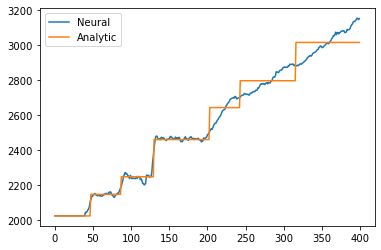

In [ ]:
y1 = tf.expand_dims(valid_X[4],0)
predictions = model1D.predict(y1)
plt.plot(predictions[0],label='Neural')
plt.plot(valid_y[4][:], label='Analytic') 
plt.legend()

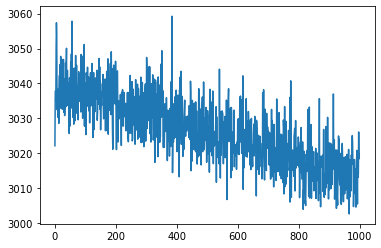

In [ ]:
plt.plot(history2.history['loss'])

In [ ]:
y1 = tf.expand_dims(train_X[2200],0)
predictions = model1D.predict(y1)
plt.plot(predictions[0],label='Neural')
plt.plot(train_y[2200][:], label='Analytic') 
plt.legend()

In [ ]:
X

array([[[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.05761121],
        [0.13379344],
        [0.2062893 ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.39451604],
        [0.47336045],
        [0.54671093]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.21857685],
        [0.29299697],
        [0.36563243]],

       ...,

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.07049578],
        [0.14334024],
        [0.2156333 ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.25244104],
        [0.32137313],
        [0.38830392]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.00100112],
        [0.0844296 ],
        [0.16753657]]])

In [ ]:
history2 = model1D.fit(train_X,train_y,batch_size=16, epochs=1000)

Epoch 1/1000
250/250 [==============================] - 8s 33ms/step - loss: 3022.1392 - accuracy: 0.0280
Epoch 2/1000
250/250 [==============================] - 8s 33ms/step - loss: 3035.6555 - accuracy: 0.0258
Epoch 3/1000
250/250 [==============================] - 8s 34ms/step - loss: 3037.8789 - accuracy: 0.0280
Epoch 4/1000
250/250 [==============================] - 8s 32ms/step - loss: 3034.9060 - accuracy: 0.0270
Epoch 5/1000
250/250 [==============================] - 8s 32ms/step - loss: 3050.5078 - accuracy: 0.0260
Epoch 6/1000
250/250 [==============================] - 8s 33ms/step - loss: 3057.3701 - accuracy: 0.0258
Epoch 7/1000
250/250 [==============================] - 8s 32ms/step - loss: 3053.8892 - accuracy: 0.0253
Epoch 8/1000
250/250 [==============================] - 8s 31ms/step - loss: 3032.5183 - accuracy: 0.0262
Epoch 9/1000
250/250 [==============================] - 8s 32ms/step - loss: 3035.7424 - accuracy: 0.0275
Epoch 10/1000
250/250 [=======================

250/250 [==============================] - 8s 32ms/step - loss: 3026.7156 - accuracy: 0.0300
Epoch 152/1000
250/250 [==============================] - 8s 32ms/step - loss: 3035.0022 - accuracy: 0.0255
Epoch 153/1000
250/250 [==============================] - 8s 31ms/step - loss: 3035.4004 - accuracy: 0.0295
Epoch 154/1000
250/250 [==============================] - 8s 31ms/step - loss: 3033.6516 - accuracy: 0.0245
Epoch 155/1000
250/250 [==============================] - 8s 31ms/step - loss: 3037.6150 - accuracy: 0.0255
Epoch 156/1000
250/250 [==============================] - 8s 31ms/step - loss: 3037.2854 - accuracy: 0.0258
Epoch 157/1000
250/250 [==============================] - 8s 31ms/step - loss: 3039.9146 - accuracy: 0.0275
Epoch 158/1000
250/250 [==============================] - 8s 30ms/step - loss: 3036.9226 - accuracy: 0.0258
Epoch 159/1000
250/250 [==============================] - 8s 31ms/step - loss: 3042.5620 - accuracy: 0.0265
Epoch 160/1000
250/250 [===================

250/250 [==============================] - 8s 32ms/step - loss: 3033.1509 - accuracy: 0.0295
Epoch 302/1000
250/250 [==============================] - 8s 31ms/step - loss: 3047.4395 - accuracy: 0.0233
Epoch 303/1000
250/250 [==============================] - 8s 32ms/step - loss: 3044.3457 - accuracy: 0.0233
Epoch 304/1000
250/250 [==============================] - 8s 32ms/step - loss: 3027.0879 - accuracy: 0.0285
Epoch 305/1000
250/250 [==============================] - 8s 32ms/step - loss: 3035.2695 - accuracy: 0.0262
Epoch 306/1000
250/250 [==============================] - 8s 32ms/step - loss: 3042.4658 - accuracy: 0.0260
Epoch 307/1000
250/250 [==============================] - 8s 32ms/step - loss: 3035.9424 - accuracy: 0.0270
Epoch 308/1000
250/250 [==============================] - 8s 33ms/step - loss: 3029.4087 - accuracy: 0.0237
Epoch 309/1000
250/250 [==============================] - 8s 33ms/step - loss: 3044.7253 - accuracy: 0.0258
Epoch 310/1000
250/250 [===================

250/250 [==============================] - 8s 30ms/step - loss: 3029.1582 - accuracy: 0.0265
Epoch 451/1000
250/250 [==============================] - 8s 30ms/step - loss: 3017.7417 - accuracy: 0.0243
Epoch 452/1000
250/250 [==============================] - 8s 30ms/step - loss: 3035.1470 - accuracy: 0.0247
Epoch 453/1000
250/250 [==============================] - 8s 30ms/step - loss: 3032.5759 - accuracy: 0.0245
Epoch 454/1000
250/250 [==============================] - 8s 30ms/step - loss: 3034.0801 - accuracy: 0.0247
Epoch 455/1000
250/250 [==============================] - 8s 31ms/step - loss: 3021.0784 - accuracy: 0.0245
Epoch 456/1000
250/250 [==============================] - 8s 31ms/step - loss: 3021.2241 - accuracy: 0.0258
Epoch 457/1000
250/250 [==============================] - 8s 30ms/step - loss: 3025.4631 - accuracy: 0.0223
Epoch 458/1000
250/250 [==============================] - 8s 30ms/step - loss: 3028.0415 - accuracy: 0.0275
Epoch 459/1000
250/250 [===================

250/250 [==============================] - 8s 30ms/step - loss: 3020.7375 - accuracy: 0.0268
Epoch 601/1000
250/250 [==============================] - 8s 30ms/step - loss: 3029.6797 - accuracy: 0.0255
Epoch 602/1000
250/250 [==============================] - 8s 30ms/step - loss: 3019.8821 - accuracy: 0.0250
Epoch 603/1000
250/250 [==============================] - 8s 30ms/step - loss: 3029.8562 - accuracy: 0.0258
Epoch 604/1000
250/250 [==============================] - 8s 30ms/step - loss: 3023.1855 - accuracy: 0.0262
Epoch 605/1000
250/250 [==============================] - 8s 30ms/step - loss: 3019.6384 - accuracy: 0.0250
Epoch 606/1000
250/250 [==============================] - 8s 30ms/step - loss: 3019.9380 - accuracy: 0.0265
Epoch 607/1000
250/250 [==============================] - 8s 30ms/step - loss: 3027.0728 - accuracy: 0.0282
Epoch 608/1000
250/250 [==============================] - 8s 30ms/step - loss: 3036.0286 - accuracy: 0.0237
Epoch 609/1000
250/250 [===================

250/250 [==============================] - 8s 30ms/step - loss: 3011.5806 - accuracy: 0.0250
Epoch 751/1000
250/250 [==============================] - 8s 32ms/step - loss: 3029.5171 - accuracy: 0.0282
Epoch 752/1000
250/250 [==============================] - 8s 31ms/step - loss: 3027.1125 - accuracy: 0.0275
Epoch 753/1000
250/250 [==============================] - 8s 30ms/step - loss: 3008.3455 - accuracy: 0.0223
Epoch 754/1000
250/250 [==============================] - 8s 30ms/step - loss: 3016.0042 - accuracy: 0.0270
Epoch 755/1000
250/250 [==============================] - 8s 31ms/step - loss: 3033.3684 - accuracy: 0.0272: 1s - loss: 3034
Epoch 756/1000
250/250 [==============================] - 8s 30ms/step - loss: 3012.1082 - accuracy: 0.0258
Epoch 757/1000
250/250 [==============================] - 7s 30ms/step - loss: 3010.4746 - accuracy: 0.0258
Epoch 758/1000
250/250 [==============================] - 8s 30ms/step - loss: 3013.7053 - accuracy: 0.0262
Epoch 759/1000
250/250 [==

250/250 [==============================] - 8s 31ms/step - loss: 3023.0259 - accuracy: 0.0262
Epoch 901/1000
250/250 [==============================] - 8s 30ms/step - loss: 3022.1174 - accuracy: 0.0260
Epoch 902/1000
250/250 [==============================] - 8s 30ms/step - loss: 3009.5410 - accuracy: 0.0275
Epoch 903/1000
250/250 [==============================] - 8s 30ms/step - loss: 3018.6345 - accuracy: 0.0275: 1s - loss: 3013.2412
Epoch 904/1000
250/250 [==============================] - 8s 30ms/step - loss: 3014.5603 - accuracy: 0.0233
Epoch 905/1000
250/250 [==============================] - 8s 30ms/step - loss: 3011.7927 - accuracy: 0.0298
Epoch 906/1000
250/250 [==============================] - 8s 30ms/step - loss: 3022.8633 - accuracy: 0.0280
Epoch 907/1000
250/250 [==============================] - 8s 31ms/step - loss: 3020.6848 - accuracy: 0.0260
Epoch 908/1000
250/250 [==============================] - 8s 30ms/step - loss: 3009.8818 - accuracy: 0.0245
Epoch 909/1000
250/25